<a href="https://colab.research.google.com/github/surendiran-20cl/Naming_Trends_Analysis/blob/main/Analyzing_Naming_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

The dataset is in zipped format. We have to extract the dataset in the program,
visualize the number of male and female babies born in a particular year, and
find out popular baby names.



# Project Overview

- The goal is to analyze baby name data from the Social Security Administration (SSA) to understand naming trends.  We'll use Python and the Pandas library to:

- Extract Data: The data is in zipped files, so you'll need to extract it.

- Visualize Trends: Show the number of male and female babies born in a given year.

- Find Popular Names: Determine the most popular baby names.

# Description:

This project not only focuses on implementing data manipulation and data
visualization using pandas library but also tests your ability to deal with real word problem statements.

# Dataset:

Popular baby names data provided by the Social Security Administration (SSA)
of the United States.


How to download the dataset:

● Go to https://www.ssa.gov/oact/babynames/limits.html

● Click on ‘National data’

● Get the zipped file


Hints:

● First, use pandas, zipfile and BytesIO library to extract the data. Find out a
way to extract only files that consist of useful data

● Hint: pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8',
engine='python', header=None)

● Then, visualize the number of male and female babies born in a particular
year with the help of pandas. DataFrame.plot, then analyze baby names
by sorting out all birth counts

● Then, analyze baby names by sorting out top 100 birth counts and group
them by names to find out popular baby names

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.  Project Setup



In [3]:
!pip install pandas

In [6]:
!pip install zipfile36

# 2. Import Libraries

In [7]:
import pandas as pd  # For data manipulation
import zipfile       # To work with zipped files
import io            # For handling in-memory file-like objects
import matplotlib.pyplot as plt # For plotting

# 3. Extracting Data from Zip File

In [9]:
# Specify the path to your zipped file
zip_file_path = "/content/drive/MyDrive/Intellipaat Colab Files/Analyzing Naming Trends/names.zip"  # Replace with your actual file name

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as z:

    dataframes = {}  # Dictionary to store DataFrames

    for filename in z.namelist():
        # Extract only the 'yob' files (e.g., yob1880.txt)
        if filename.startswith('yob') and filename.endswith('.txt'):

            # Read the data directly from the zip file
            with z.open(filename) as file:
                df = pd.read_csv(io.BytesIO(file.read()),
                                 header=None,
                                 names=['Name', 'Gender', 'Births'])

            # Extract the year from the filename (e.g., 'yob1880.txt' -> 1880)
            year = int(filename[3:7])
            df['Year'] = year  # Add a 'Year' column
            dataframes[year] = df

# Concatenate all DataFrames into a single DataFrame
all_years_data = pd.concat(dataframes.values(), ignore_index=True)

print("Data extracted and combined.")


Data extracted and combined.


- We open the zip file using zipfile.ZipFile.
- We iterate through each file in the zip archive (z.namelist()).
- We check if the filename starts with "yob" and ends with ".txt" to ensure we're processing the correct data files. This is based on the file structure in the zip.
- z.open(filename) opens each file within the zip.
- io.BytesIO(file.read()) reads the file content into a BytesIO object, which can be read by Pandas.
- pd.read_csv reads the data, specifying header=None because the files don't have headers, and we provide column names: 'Name', 'Gender', and 'Births'.
- We extract the year from the filename and add it as a new column.
- Finally, we concatenate all the yearly DataFrames into one large DataFrame called all_years_data for easier analysis.

In [10]:
print(all_years_data.head())  # Display the first few rows

        Name Gender  Births  Year
0       Mary      F    7065  1880
1       Anna      F    2604  1880
2       Emma      F    2003  1880
3  Elizabeth      F    1939  1880
4     Minnie      F    1746  1880


In [12]:
print(all_years_data)

              Name Gender  Births  Year
0             Mary      F    7065  1880
1             Anna      F    2604  1880
2             Emma      F    2003  1880
3        Elizabeth      F    1939  1880
4           Minnie      F    1746  1880
...            ...    ...     ...   ...
2117214      Zyell      M       5  2023
2117215       Zyen      M       5  2023
2117216     Zymirr      M       5  2023
2117217     Zyquan      M       5  2023
2117218      Zyrin      M       5  2023

[2117219 rows x 4 columns]


# 4.  Visualize Number of Male and Female Babies Born Each Year

In [13]:
# Group data by 'Year' and 'Gender' and sum the 'Births'
births_by_year_gender = all_years_data.groupby(['Year', 'Gender'])['Births'].sum().unstack()


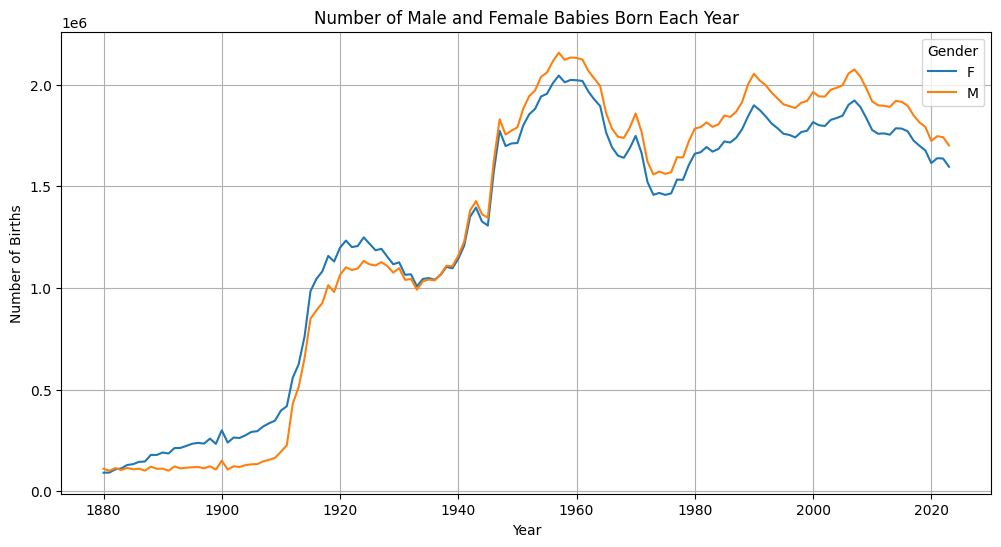

In [14]:
# Plot the data
births_by_year_gender.plot(figsize=(12, 6))
plt.title('Number of Male and Female Babies Born Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Explanation:

- We group the data by Year and Gender and calculate the total births for each group. unstack() is used to pivot the 'Gender' values into columns.
- We use plot() to create a line chart.
- We add a title, labels, a legend, and a grid for better readability.
- plt.show() displays the plot.

# 5.  Find Popular Baby Names



In [16]:
# Group by 'Name' and sum the 'Births' to get total births per name
total_births_by_name = all_years_data.groupby('Name')['Births'].sum().sort_values(ascending=False)

print("Total Births per Name:")
print(total_births_by_name)

Total Births per Name:
Name
James       5250328
John        5187975
Robert      4862085
Michael     4431942
William     4194193
             ...   
Aadhrit           5
Aadhirai          5
Zysean            5
Aafreen           5
Zyndaya           5
Name: Births, Length: 103564, dtype: int64


In [17]:
# Get the top 100 most popular names
top_100_names = total_births_by_name.head(100)

print("\nTop 100 Most Popular Baby Names:")
print(top_100_names)


Top 100 Most Popular Baby Names:
Name
James      5250328
John       5187975
Robert     4862085
Michael    4431942
William    4194193
            ...   
Aaron       610436
Brenda      610223
Frances     598903
Pamela      596281
Willie      596072
Name: Births, Length: 100, dtype: int64


In [18]:
#If you want to analyze the top names over time
def top_names_by_year(data, year, top_n=10):
    year_data = data[data['Year'] == year]
    top_names = year_data.groupby('Name')['Births'].sum().nlargest(top_n)
    return top_names

print("\nTop 10 Names in 1990:")
print(top_names_by_year(all_years_data, 1990, 10))


Top 10 Names in 1990:
Name
Michael        65590
Christopher    52542
Jessica        46620
Ashley         45798
Matthew        44939
Joshua         43396
Brittany       36648
Amanda         34509
Daniel         33977
David          33864
Name: Births, dtype: int64


In [20]:
#If you want to analyze the top names over time
def top_names_by_year(data, year, top_n=10):
    year_data = data[data['Year'] == year]
    top_names = year_data.groupby('Name')['Births'].sum().nlargest(top_n)
    return top_names

print("\nTop 10 Names in 2000:")
print(top_names_by_year(all_years_data, 2000, 10))


Top 10 Names in 2000:
Name
Jacob          34549
Michael        32156
Matthew        28623
Joshua         27594
Emily          25989
Christopher    24986
Nicholas       24692
Andrew         23699
Hannah         23111
Joseph         22867
Name: Births, dtype: int64


In [21]:
#If you want to analyze the top names over time
def top_names_by_year(data, year, top_n=10):
    year_data = data[data['Year'] == year]
    top_names = year_data.groupby('Name')['Births'].sum().nlargest(top_n)
    return top_names

print("\nTop 10 Names in 2010:")
print(top_names_by_year(all_years_data, 2010, 10))


Top 10 Names in 2010:
Name
Isabella     22964
Jacob        22177
Sophia       20680
Jayden       18661
Ethan        18034
Michael      17413
Emma         17378
William      17091
Olivia       17063
Alexander    16811
Name: Births, dtype: int64


In [22]:
#If you want to analyze the top names over time
def top_names_by_year(data, year, top_n=10):
    year_data = data[data['Year'] == year]
    top_names = year_data.groupby('Name')['Births'].sum().nlargest(top_n)
    return top_names

print("\nTop 10 Names in 2023:")
print(top_names_by_year(all_years_data, 2023, 10))


Top 10 Names in 2023:
Name
Liam         20832
Noah         19451
Olivia       15276
Oliver       14768
Emma         13544
Charlotte    12610
Amelia       12318
Sophia       11952
James        11749
Elijah       11472
Name: Births, dtype: int64


Explanation:

- We group the data by Name and sum the Births to find the total number of births for each name across all years.
- sort_values(ascending=False) sorts the names in descending order of popularity (most births first).
- head(100) selects the top 100 names.
- The top_names_by_year function allows you to find the top N names in a specific year.

# Key Concepts

- Pandas DataFrames:
The core data structure in Pandas. Think of it as a table with rows and columns.

- Data Grouping: The groupby() method is incredibly powerful for aggregating and summarizing data.

- Data Visualization: Matplotlib is a fundamental library for creating plots and charts in Python.

- Pandas integrates with Matplotlib for convenient plotting from DataFrames.

- String Manipulation: We used string slicing (filename[3:7]) to extract the year from the filename.

- File I/O: The zipfile and io libraries are essential for working with compressed data.

# Additional Visualizations

## Top 10 Names Over Time (Line Chart):

- Visualize how the popularity of the top 10 names has changed over the years. This will help see trends and shifts in naming preferences.

## Name Diversity (Line Chart or Area Chart):

- Calculate a measure of name diversity for each year (e.g., the number of names that account for a certain percentage of total births). Visualize how name diversity has changed over time. This can show if naming patterns are becoming more concentrated or more diverse.

## Gender Ratio Over Time (Line Chart):

- Visualize the ratio of male to female births each year. This can reveal if there are any significant shifts in gender balance over the years.

## Popularity Distribution (Histogram):

- Show the distribution of name popularity (number of births) in a given year. This can help visualize how many names are very popular versus how many are less common.

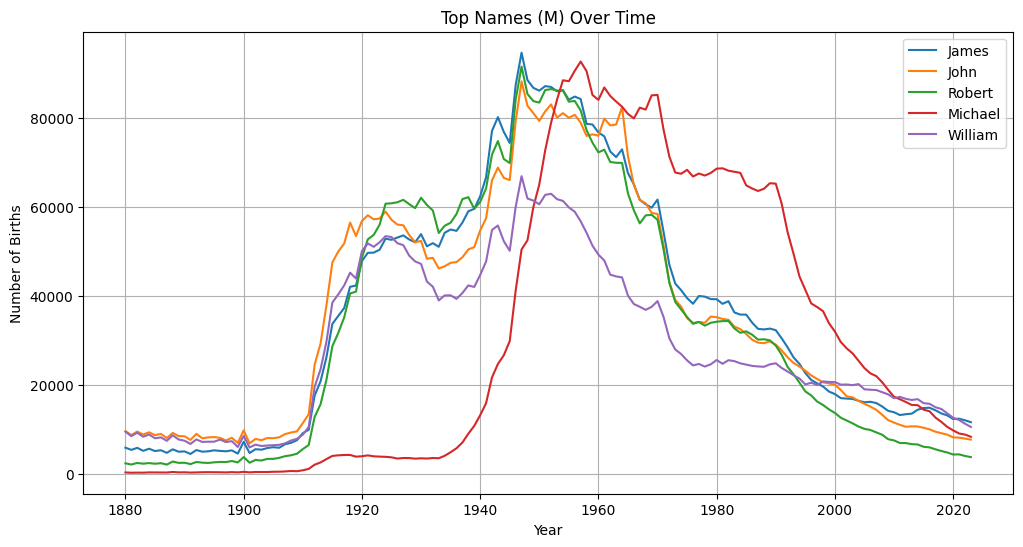

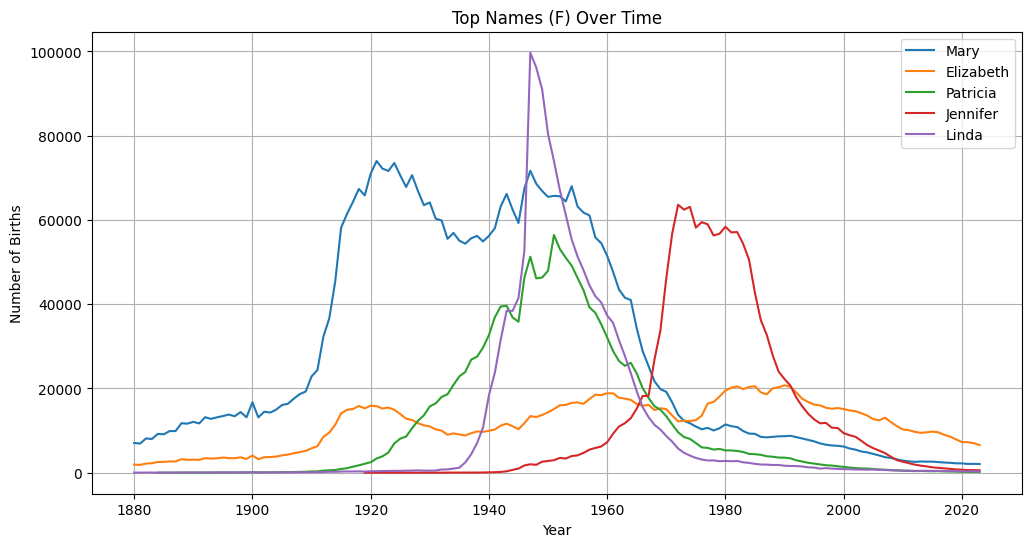

In [25]:
#1. Top 10 Names Over Time (Line Chart)

def plot_top_names_over_time(data, names, gender, n_years=20):
    """Plots the popularity of given names over time."""

    plt.figure(figsize=(12, 6))
    for name in names:
        name_data = data[(data['Name'] == name) & (data['Gender'] == gender)]
        plt.plot(name_data['Year'], name_data['Births'], label=name)
    plt.title(f'Top Names ({gender}) Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Births')
    plt.legend()
    plt.grid(True)
    plt.show()

# Get top 5 male and female names overall
top_male_names = all_years_data[all_years_data['Gender'] == 'M'].groupby('Name')['Births'].sum().nlargest(5).index
top_female_names = all_years_data[all_years_data['Gender'] == 'F'].groupby('Name')['Births'].sum().nlargest(5).index

# Plot top names over time
plot_top_names_over_time(all_years_data, top_male_names, 'M')
print("\n")
plot_top_names_over_time(all_years_data, top_female_names, 'F')

- The plot_top_names_over_time function takes the data, a list of names, and a gender as input.
- It filters the data for each name and gender and plots the number of births over the years.

<ipython-input-26-2f8021fc4935>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_1000_prop = data.groupby('Year').apply(get_top_cumulative_prop)


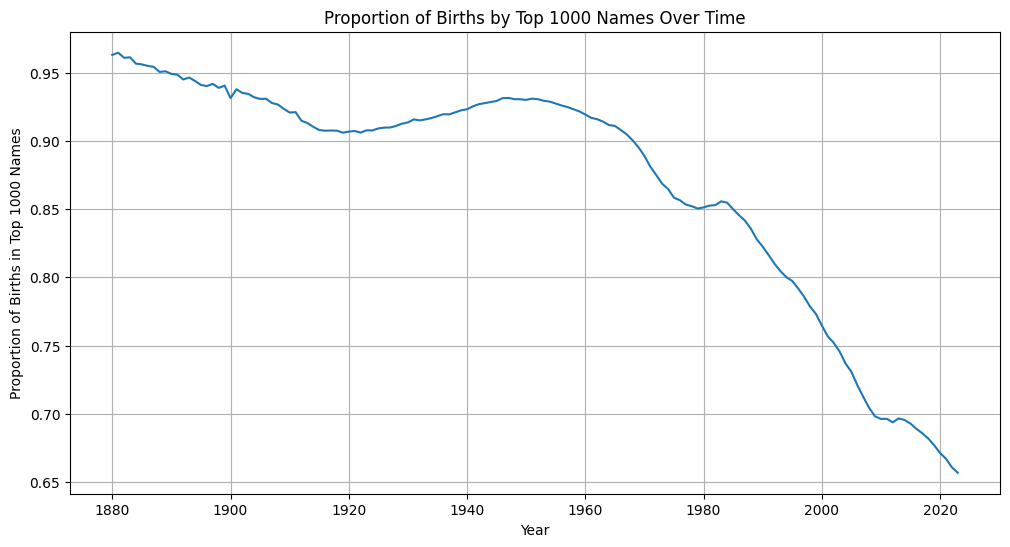

In [26]:
# 2. Name Diversity (Line Chart)

def plot_name_diversity(data):
    """Plots the name diversity over time."""

    total_births_by_year = data.groupby('Year')['Births'].sum()

    def get_top_cumulative_prop(group, top_n=1000):
        group = group.sort_values(by='Births', ascending=False)
        group['Cumulative_Prop'] = group['Births'].cumsum() / group['Births'].sum()
        return group['Cumulative_Prop'].iloc[top_n]

    top_1000_prop = data.groupby('Year').apply(get_top_cumulative_prop)

    plt.figure(figsize=(12, 6))
    plt.plot(top_1000_prop.index, top_1000_prop.values)
    plt.title('Proportion of Births by Top 1000 Names Over Time')
    plt.xlabel('Year')
    plt.ylabel('Proportion of Births in Top 1000 Names')
    plt.grid(True)
    plt.show()

plot_name_diversity(all_years_data)

- get_top_cumulative_prop calculates the proportion of total births accounted for by the top N names in each year.
- The code then plots this proportion over time, showing how concentrated or diverse the naming trends are.

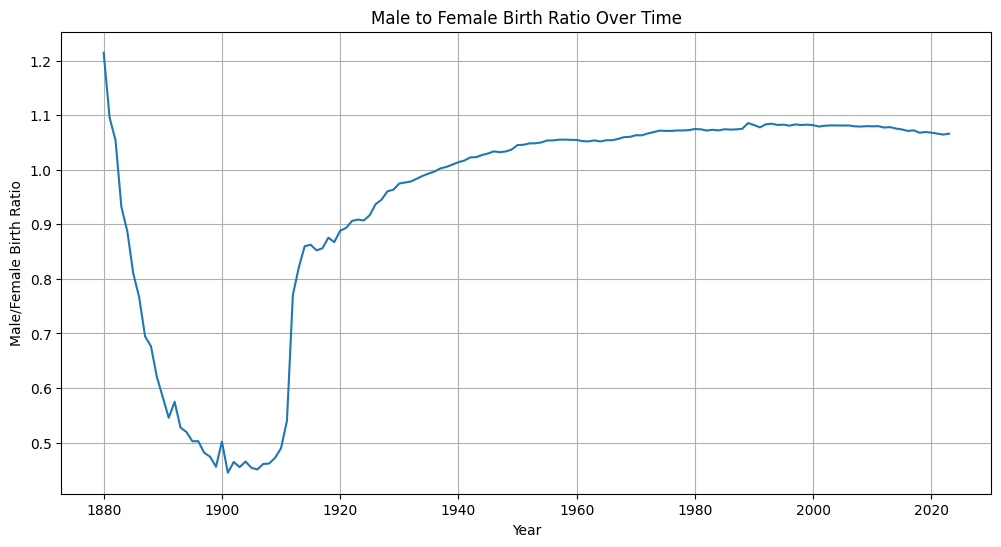

In [27]:
# 3. Gender Ratio Over Time (Line Chart)

def plot_gender_ratio(data):
    """Plots the ratio of male to female births over time."""

    total_births_by_year_gender = data.groupby(['Year', 'Gender'])['Births'].sum().unstack()
    total_births_by_year_gender['Ratio'] = total_births_by_year_gender['M'] / total_births_by_year_gender['F']

    plt.figure(figsize=(12, 6))
    plt.plot(total_births_by_year_gender.index, total_births_by_year_gender['Ratio'])
    plt.title('Male to Female Birth Ratio Over Time')
    plt.xlabel('Year')
    plt.ylabel('Male/Female Birth Ratio')
    plt.grid(True)
    plt.show()

plot_gender_ratio(all_years_data)

This code calculates the ratio of male to female births for each year and plots it. A ratio of 1 indicates an equal number of male and female births.

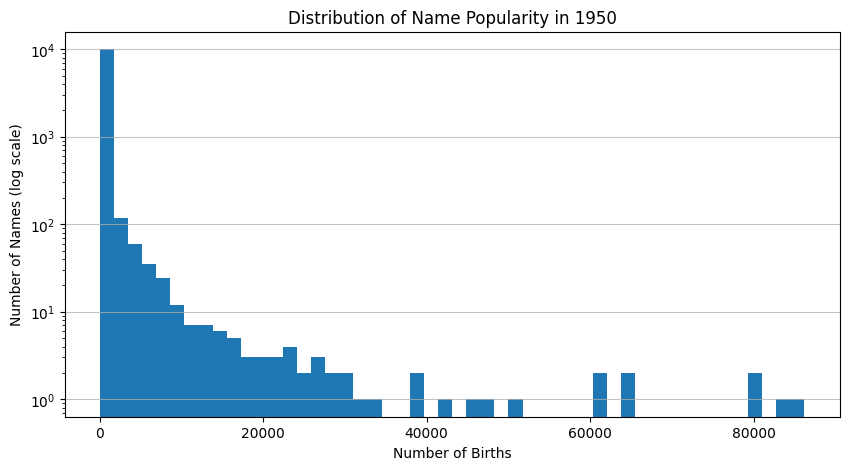

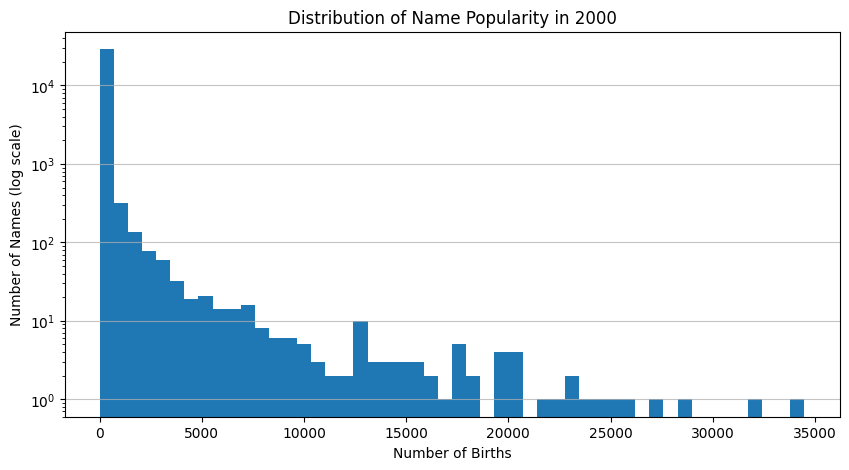

In [29]:
# 4. Popularity Distribution (Histogram)

def plot_popularity_distribution(data, year):
    """Plots the distribution of name popularity (births) in a given year."""

    year_data = data[data['Year'] == year]
    plt.figure(figsize=(10, 5))
    plt.hist(year_data['Births'], bins=50, log=True)  # Using log scale for y-axis
    plt.title(f'Distribution of Name Popularity in {year}')
    plt.xlabel('Number of Births')
    plt.ylabel('Number of Names (log scale)')
    plt.grid(True, axis='y', alpha=0.75)
    plt.show()

plot_popularity_distribution(all_years_data, 1950) # Choose a year to visualize
print("\n")
plot_popularity_distribution(all_years_data, 2000)

- This code generates a histogram showing the frequency of different birth counts for names in a specific year.

- The log=True argument makes it easier to see the distribution of less frequent names.

# Conclusion

This project successfully demonstrated the process of extracting, manipulating, and visualizing baby name data using Python and the Pandas library. We were able to gain valuable insights into naming trends over time by analyzing data provided by the Social Security Administration (SSA).

Key findings of our analysis include:

* **Evolution of Birth Counts:** The visualizations clearly illustrated the fluctuations in the number of male and female births across different years, revealing potential demographic shifts or historical influences on birth rates.
   
* **Popular Name Identification:** We identified the most popular baby names overall and developed a method to extract the top names for specific years, providing a clear view of naming preferences.
   
* **Trends in Name Popularity:** By visualizing the popularity of top names over time, we observed how certain names gain or lose popularity, indicating evolving cultural preferences and social trends.
   
* **Name Diversity Analysis:** The analysis of name diversity revealed changes in the concentration or distribution of names over the years, suggesting whether naming patterns are becoming more varied or more focused on a smaller set of names.
   
* **Gender Ratio Trends:** Visualizing the male to female birth ratio provided insights into potential shifts in gender demographics, although the ratio remained relatively stable.

These findings highlight the power of data analysis in uncovering trends and patterns in seemingly simple datasets.

# Future Work

To further expand on this analysis, several avenues could be explored:

* **Regional Analysis:** Investigating naming trends at the state or regional level could reveal geographic variations in name preferences.
   
* **Correlation with Socioeconomic Factors:** Exploring potential correlations between naming trends and socioeconomic indicators could provide deeper insights into the social influences on name choices.
   
* **Sentiment Analysis:** Analyzing the names themselves using sentiment analysis techniques might uncover emotional or cultural associations with certain names.
   
* **Interactive Visualization:** Creating interactive visualizations would allow users to explore the data in more detail and gain personalized insights.

In conclusion, this project provides a solid foundation for understanding baby name trends using Python. The analysis and visualizations offer valuable insights, and the suggestions for future work provide a roadmap for further exploration of this fascinating dataset.